<a href="https://colab.research.google.com/github/costpetrides/NOx-Ozone-Relationship-Modeling-with-ML/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost

## Data Set 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('https://raw.githubusercontent.com/costpetrides/NOx-Ozone-Relationship-Modeling-with-ML/main/DATA/DATA_1.csv')
cols = df.columns.tolist()
df.head()

,PM2.5,PM10,NOx,NH3,CO,SO2,O3
0,48.57,95.68,17.15,15.85,0.92,27.64,133.36
1,48.57,95.68,16.46,15.85,0.97,24.55,34.06
2,48.57,95.68,29.70,15.85,17.40,29.07,30.70
3,48.57,95.68,17.97,15.85,1.70,18.59,36.08
4,48.57,95.68,37.76,15.85,22.10,39.33,39.31


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Custom Regression Report:
Mean Absolute Error: 9.55
Mean Squared Error: 194.59
R-squared (R2): 0.52


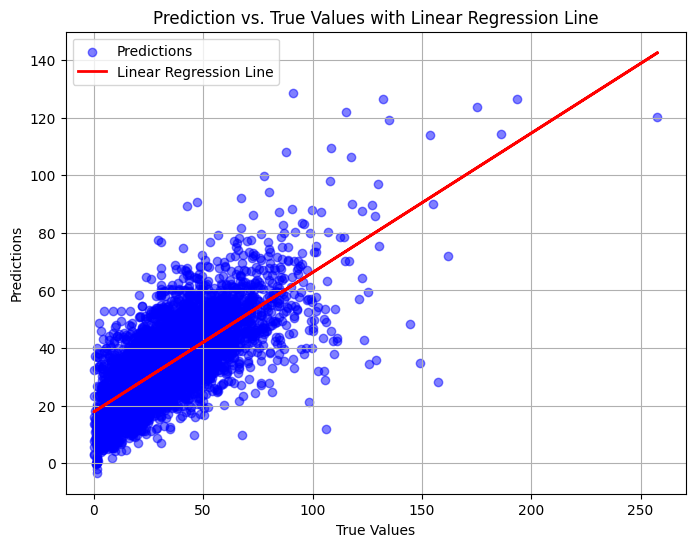

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the data into training (60%) and test (40%) sets
train_df, test_df = train_test_split(df, test_size=0.4, random_state=42)

# Split the test set into validation (50%) and test (50%) sets
valid_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)

# Preprocessing function
def preprocess_data(dataframe, target_column):
    x = dataframe.drop(columns=[target_column]).values
    y = dataframe[target_column].values
    return x, y

# Apply preprocessing to datasets
train_x, train_y = preprocess_data(train_df, 'O3')
valid_x, valid_y = preprocess_data(valid_df, 'O3')
test_x, test_y = preprocess_data(test_df, 'O3')

# Standardize features (optional)
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
valid_x = scaler.transform(valid_x)
test_x = scaler.transform(test_x)

# Define the XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')

# Hyperparameter tuning using Grid Search
param_grid = {
    'colsample_bytree': [0.3, 0.5],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'alpha': [0, 10, 100],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3, verbose=1, n_jobs=-1)

grid_search.fit(train_x, train_y)


# Best model from Grid Search
best_xg_reg = grid_search.best_estimator_

# Predict on the test set
pred_y = best_xg_reg.predict(test_x)

# Evaluate the model
mae = mean_absolute_error(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)

# Display the custom regression report
print("Custom Regression Report:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Fit a Linear Regression model to the data
linear_reg = LinearRegression()
linear_reg.fit(test_y.reshape(-1, 1), pred_y)

# Predict using the fitted linear regression model
regression_line = linear_reg.predict(test_y.reshape(-1, 1))

# Plot Prediction vs. True Values with Linear Regression Line
plt.figure(figsize=(8, 6))
plt.scatter(test_y, pred_y, alpha=0.5, color='blue', label='Predictions')
plt.plot(test_y, regression_line, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Prediction vs. True Values with Linear Regression Line')
plt.legend()
plt.grid(True)
plt.show()


## Data Set 2

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('https://raw.githubusercontent.com/costpetrides/NOx-Ozone-Relationship-Modeling-with-ML/main/DATA/Data_2.csv')
cols = df.columns.tolist()
df.head()

,City,PM2.5,PM10,NOx,NH3,CO,SO2,O3
0,0,48.57,95.68,17.15,15.85,0.92,27.64,133.36
1,0,48.57,95.68,16.46,15.85,0.97,24.55,34.06
2,0,48.57,95.68,29.70,15.85,17.40,29.07,30.70
3,0,48.57,95.68,17.97,15.85,1.70,18.59,36.08
4,0,48.57,95.68,37.76,15.85,22.10,39.33,39.31


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Custom Regression Report:
Mean Absolute Error: 9.59
Mean Squared Error: 208.99
R-squared (R2): 0.50
Cross-Validated Mean Squared Error (Training Data): 204.33


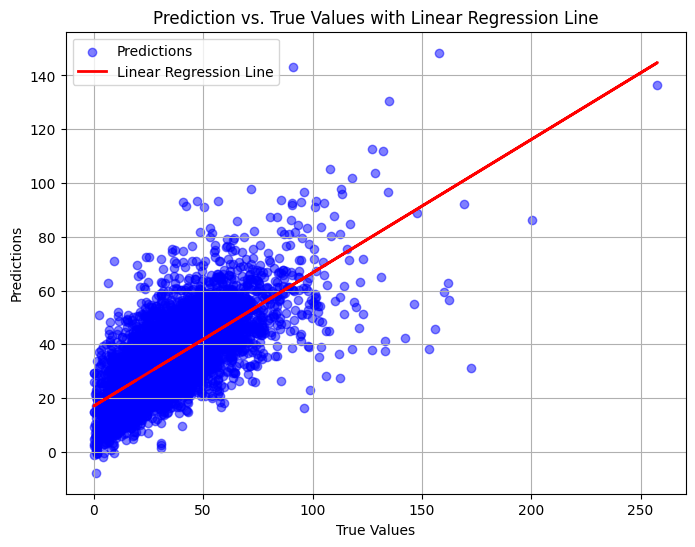

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the data into training (60%) and test (40%) sets
train_df, test_df = train_test_split(df, test_size=0.4, random_state=42)

# Split the test set into validation (50%) and test (50%) sets
valid_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)

# Preprocessing function
def preprocess_data(dataframe, target_column):
    x = dataframe.drop(columns=[target_column]).values
    y = dataframe[target_column].values
    return x, y

# Apply preprocessing to datasets
train_x, train_y = preprocess_data(train_df, 'O3')
valid_x, valid_y = preprocess_data(valid_df, 'O3')
test_x, test_y = preprocess_data(test_df, 'O3')

# Standardize features (optional)
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
valid_x = scaler.transform(valid_x)
test_x = scaler.transform(test_x)

# Define the XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')

# Hyperparameter tuning using Grid Search
param_grid = {
    'colsample_bytree': [0.3, 0.5],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'alpha': [0, 10, 100],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3, verbose=1, n_jobs=-1)

grid_search.fit(train_x, train_y)


# Best model from Grid Search
best_xg_reg = grid_search.best_estimator_

# Predict on the test set
pred_y = best_xg_reg.predict(test_x)

# Evaluate the model
mae = mean_absolute_error(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)

# Display the custom regression report
print("Custom Regression Report:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Fit a Linear Regression model to the data
linear_reg = LinearRegression()
linear_reg.fit(test_y.reshape(-1, 1), pred_y)

# Predict using the fitted linear regression model
regression_line = linear_reg.predict(test_y.reshape(-1, 1))

# Plot Prediction vs. True Values with Linear Regression Line
plt.figure(figsize=(8, 6))
plt.scatter(test_y, pred_y, alpha=0.5, color='blue', label='Predictions')
plt.plot(test_y, regression_line, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Prediction vs. True Values with Linear Regression Line')
plt.legend()
plt.grid(True)
plt.show()
